## **1. Exploratory Data Analysis**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
data.isnull().sum().any()

False

There are no null values in the dataset

### **Compare the two schools GP & MS with the score G3**

In [ ]:
sc_gp = data[data['school']=='GP']['G3'].value_counts()
sc_ms = data[data['school']=='MS']['G3'].value_counts()
sc_df = pd.DataFrame([sc_gp, sc_ms], index=['School GP', 'School MS'])
sc_df = sc_df.T

<Axes: >

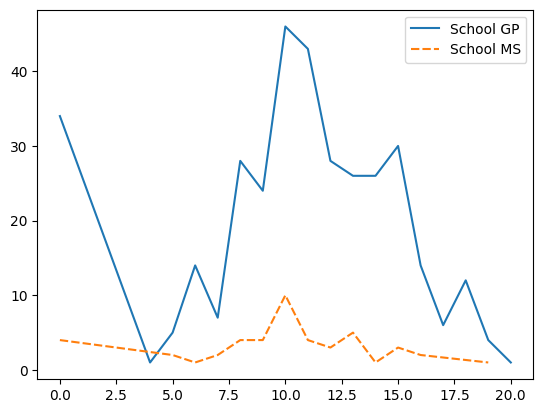

In [ ]:
sns.lineplot(data=sc_df)

From the above lineplot, School GP is outperforming School MS

### **Compare Age and Sex with G3**

<Axes: title={'center': 'Distribution of count of Age & Sex'}, xlabel='age', ylabel='count'>

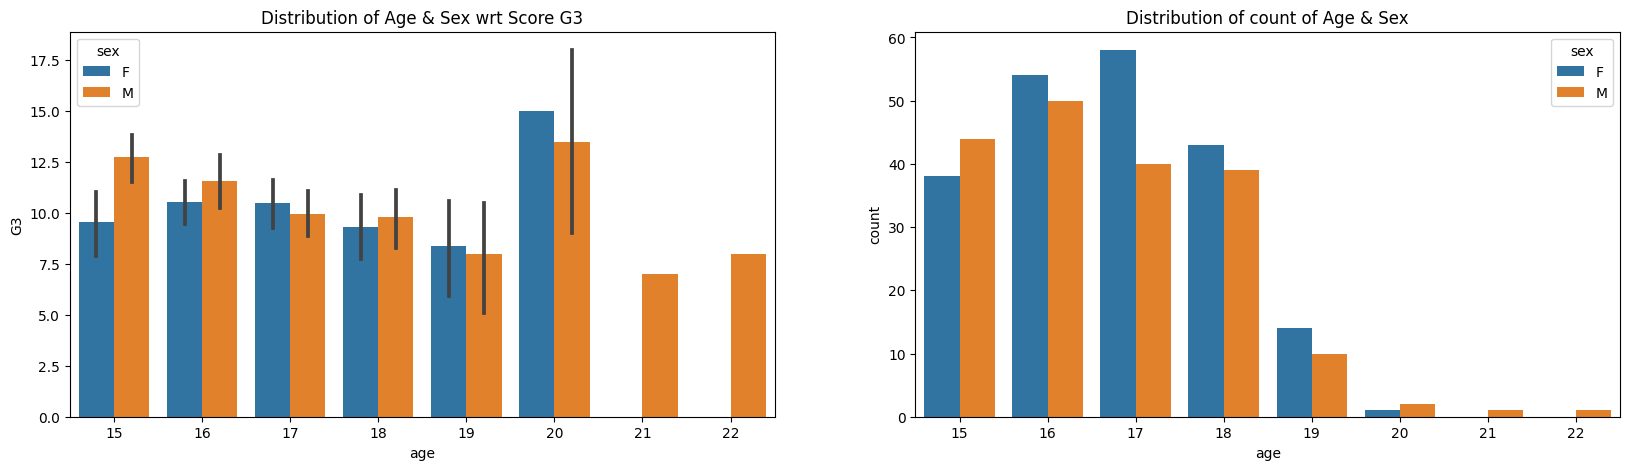

In [ ]:
fg, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].set_title('Distribution of Age & Sex wrt Score G3')
sns.barplot(x='age', y='G3', hue='sex', data=data, ax=axs[0])

axs[1].set_title('Distribution of count of Age & Sex')
sns.countplot(x='age', hue='sex', data=data, ax=axs[1])

We do not get much information from Age and Sex

### **Compare family (father & mother) eduction with G3¶**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.1% of the points cannot be placed; you m

<Axes: ylabel='G3'>

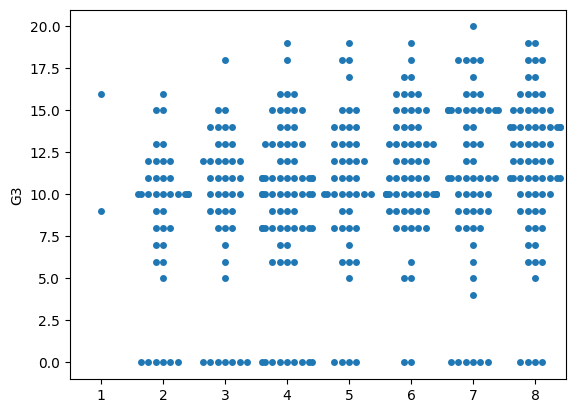

In [ ]:
fam_edu = data['Fedu'] + data['Medu']
sns.swarmplot(x=fam_edu, y='G3', data=data)

Students having good family education background are performing better.

### **Compare travel and study time with G3**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


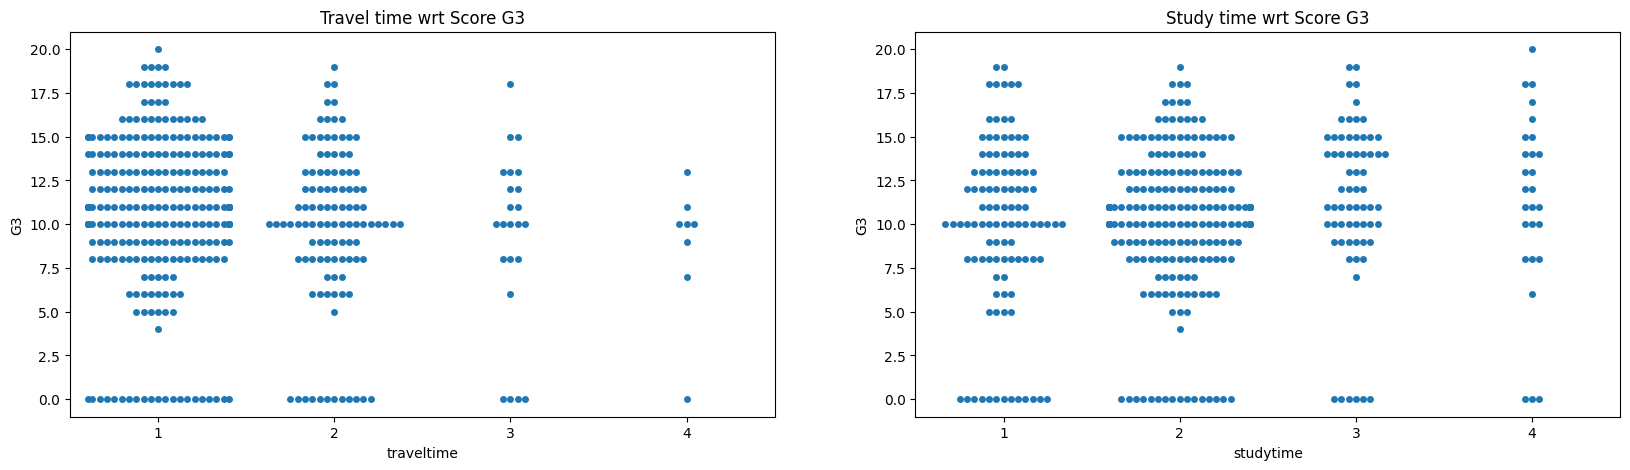

In [ ]:
fg, axs = plt.subplots(1, 2, figsize=(20,5))

axs[0].set_title('Travel time wrt Score G3')
sns.swarmplot(x='traveltime', y='G3', data=data, ax=axs[0])

axs[1].set_title('Study time wrt Score G3')
fig = sns.swarmplot(x='studytime', y='G3', data=data, ax=axs[1])
fig =fig.get_figure()
fig.savefig('Compare_travel_and_study_time_with_G3.png')



*   Students living near the school have scoring better than the far students.

*   Students having more weekly study time (over 10hrs) are getting better score.



### **Compare other features¶**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you

Text(0.5, 135.7222222222222, 'Romantic Relation')

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


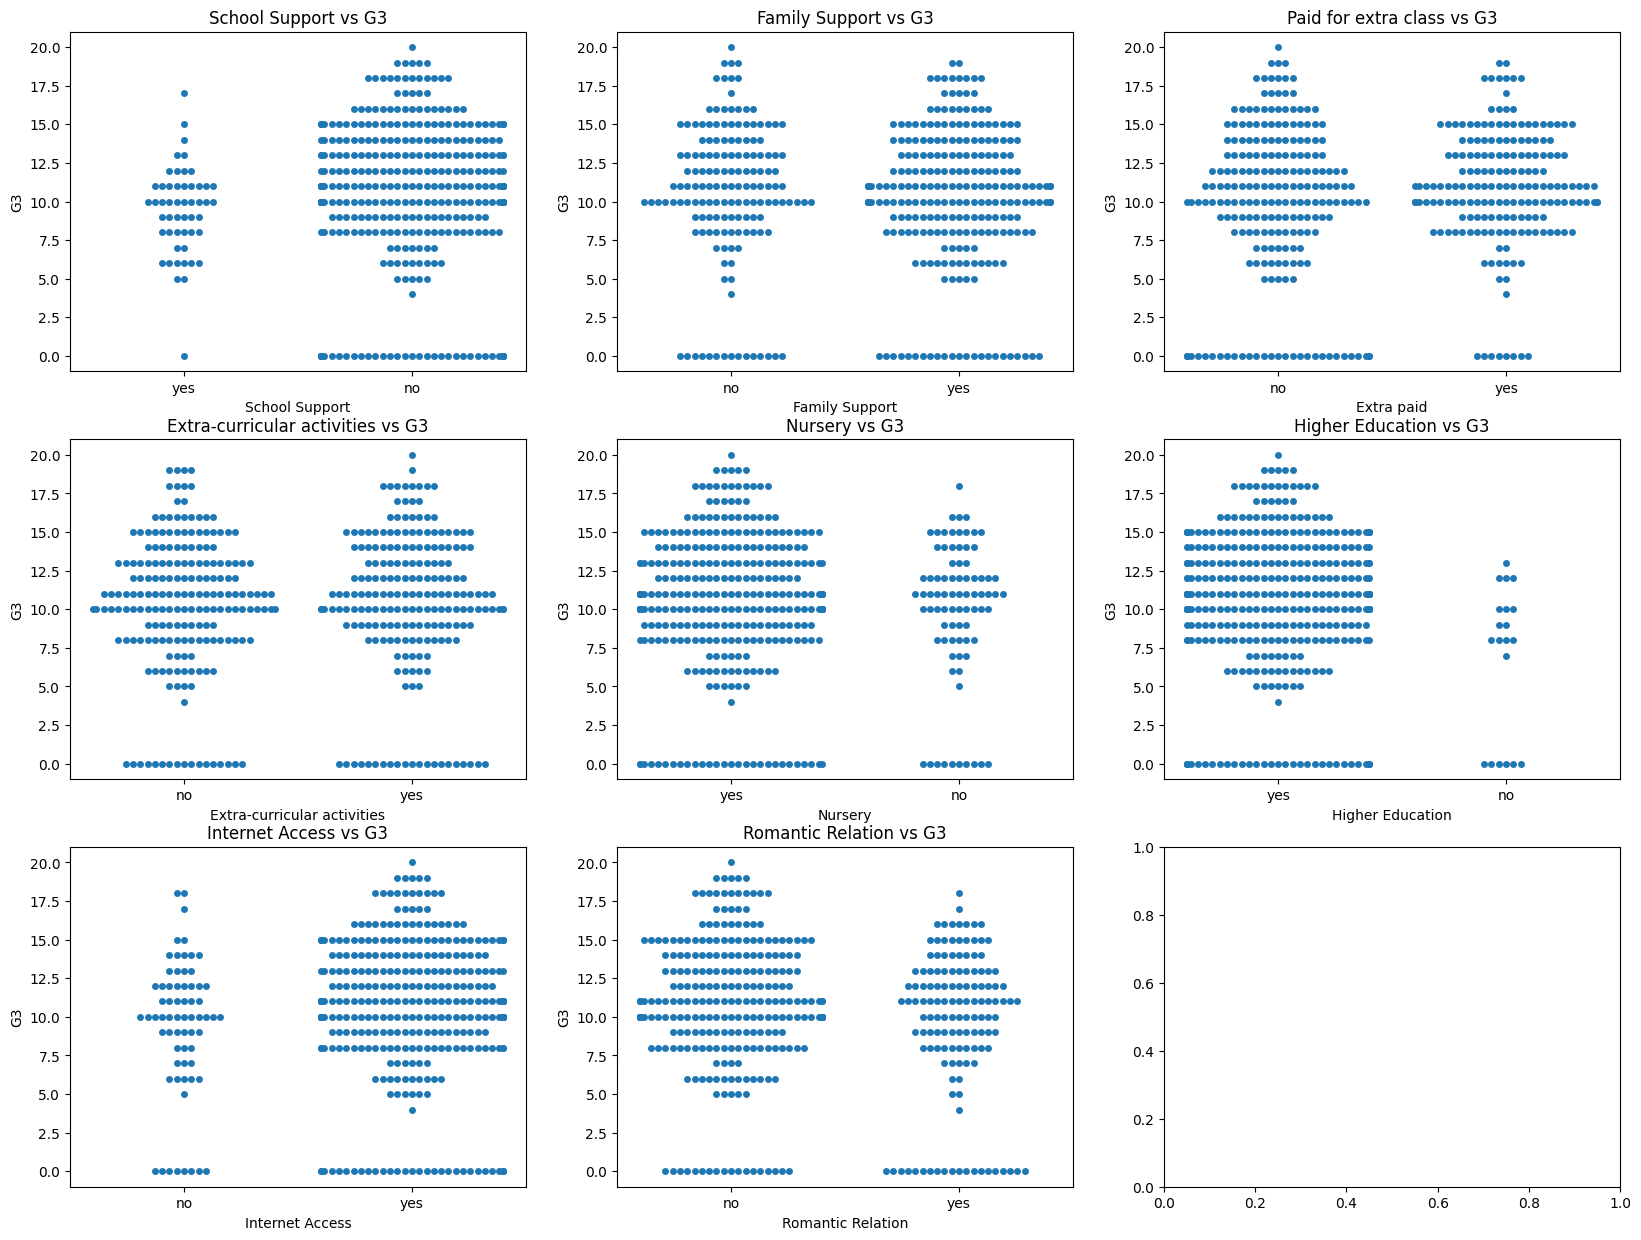

In [ ]:
fg, axs = plt.subplots(3,3, figsize=(20,15))

axs[0,0].set_title('School Support vs G3')
sns.swarmplot(x='schoolsup', y='G3', data=data, ax=axs[0,0])
axs[0,0].set_xlabel('School Support')

axs[0,1].set_title('Family Support vs G3')
sns.swarmplot(x='famsup', y='G3', data=data, ax=axs[0,1])
axs[0,1].set_xlabel('Family Support')

axs[0,2].set_title('Paid for extra class vs G3')
sns.swarmplot(x='paid', y='G3', data=data, ax=axs[0,2])
axs[0,2].set_xlabel('Extra paid')

axs[1,0].set_title('Extra-curricular activities vs G3')
sns.swarmplot(x='activities', y='G3', data=data, ax=axs[1,0])
axs[1,0].set_xlabel('Extra-curricular activities')

axs[1,1].set_title('Nursery vs G3')
sns.swarmplot(x='nursery', y='G3', data=data, ax=axs[1,1])
axs[1,1].set_xlabel('Nursery')

axs[1,2].set_title('Higher Education vs G3')
sns.swarmplot(x='higher', y='G3', data=data, ax=axs[1,2])
axs[1,2].set_xlabel('Higher Education')

axs[2,0].set_title('Internet Access vs G3')
sns.swarmplot(x='internet', y='G3', data=data, ax=axs[2,0])
axs[2,0].set_xlabel('Internet Access')

axs[2,1].set_title('Romantic Relation vs G3')
sns.swarmplot(x='romantic', y='G3', data=data, ax=axs[2,1])
axs[2,1].set_xlabel('Romantic Relation')




*   Students who doesn't have school support are showing negative trend.




*   Students who paid for extra classes are showing negative trend.

*   Students who went to nursery schools are performing better.
*   Students who with to proceed with higher eduction are performing better.


*   Students having internet access are performing better.
*   Students having no romantic relation are performing better.







/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: ylabel='G3'>

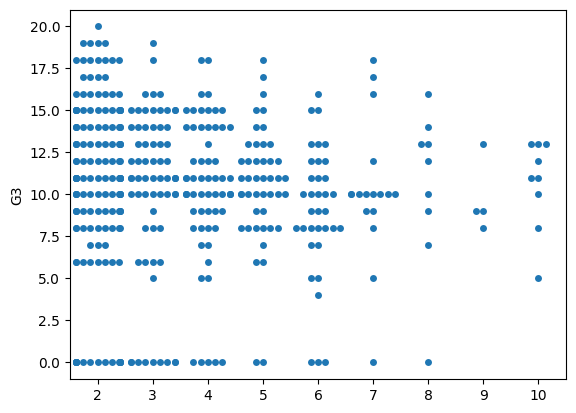

In [ ]:
#Lets check the alcohol consumption
alc = data['Dalc'] + data['Walc']
sns.swarmplot(x=alc, y='G3', data=data)

Students having more alcohol consumption has performing very poor.

### **Probability Distribution of Grades**

<ipython-input-103-4351e42fe1a7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(data['G1'], ax=axs[0])
<ipython-input-103-4351e42fe1a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g2 = sns.distplot(data['G2'], ax=axs[1])
<ipython-input-103-4351e42fe1a7>:4: UserWarning: 

`distplot` is a deprecate

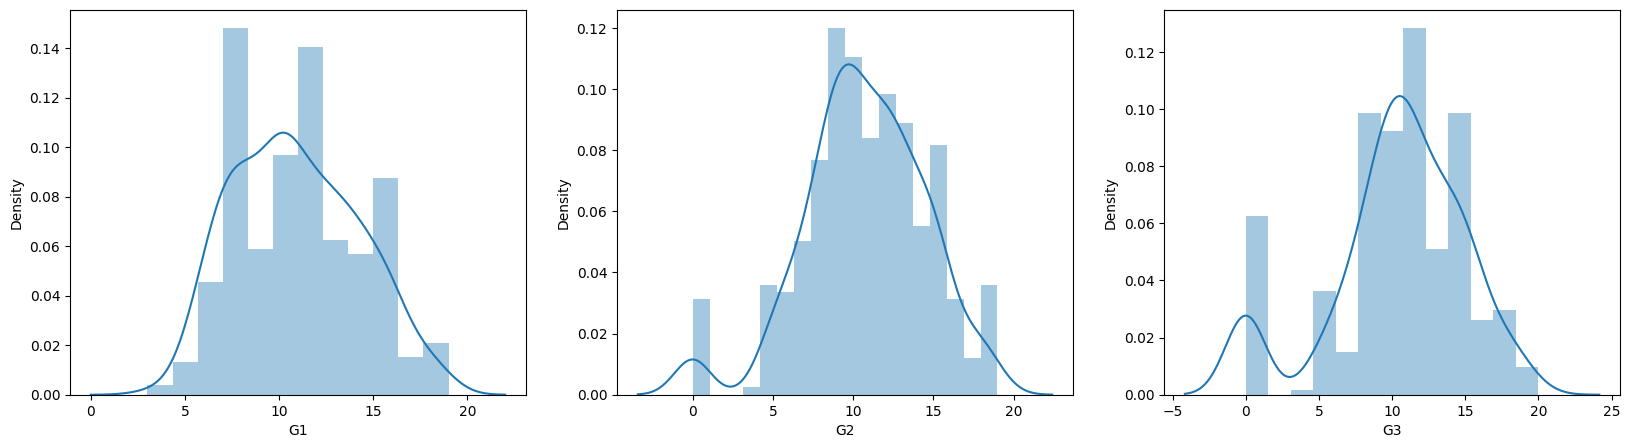

In [ ]:
fg, axs = plt.subplots(1, 3, figsize=(20, 5))
g1 = sns.distplot(data['G1'], ax=axs[0])
g2 = sns.distplot(data['G2'], ax=axs[1])
g3 = sns.distplot(data['G3'], ax=axs[2])


### **Compare G1 and G2 with G3**

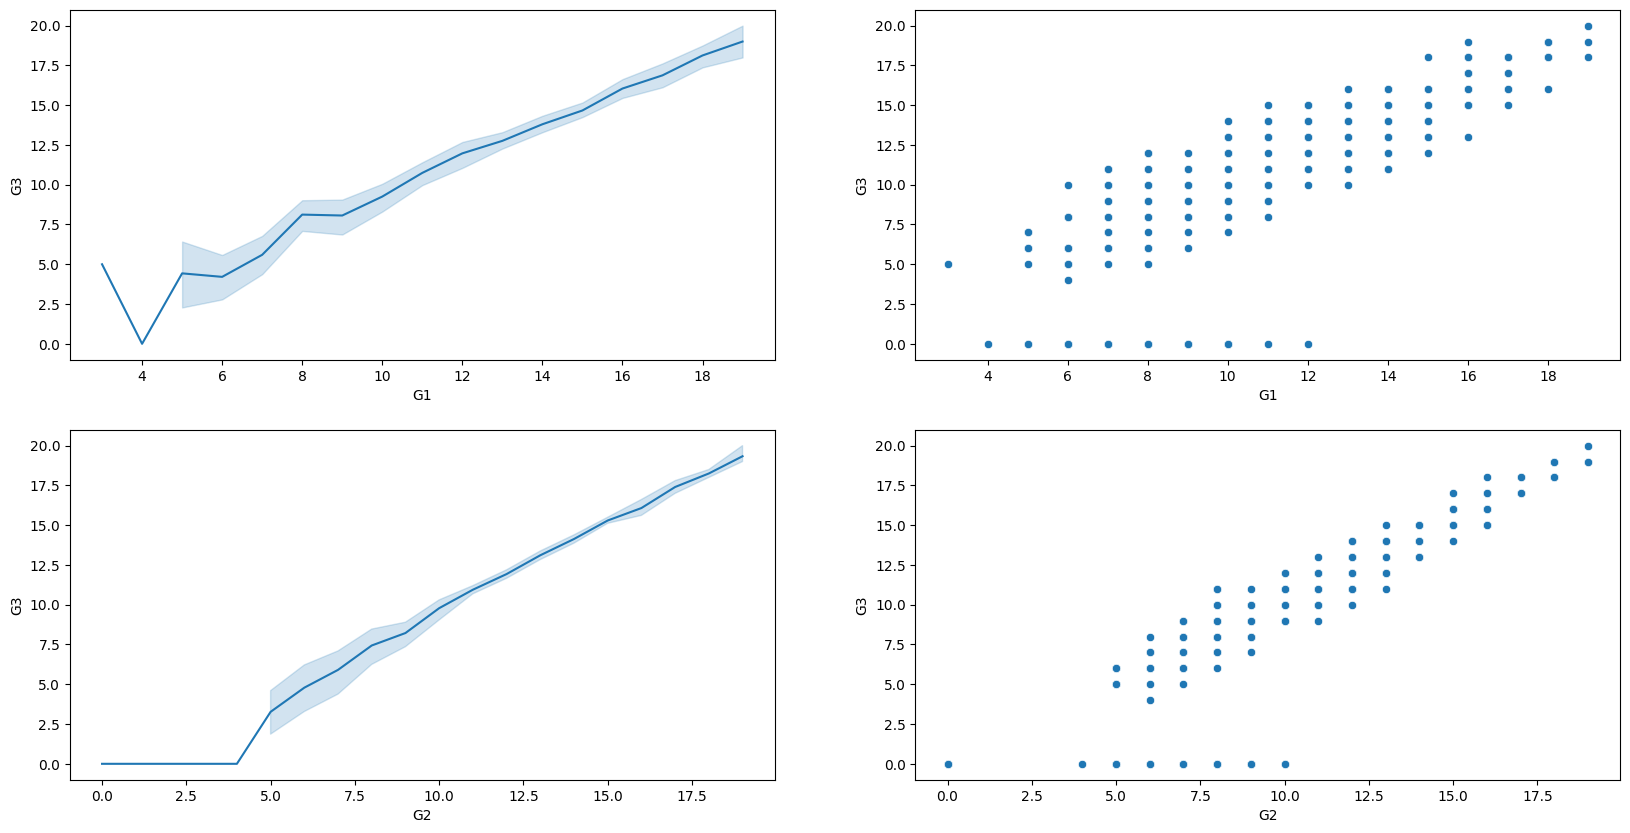

In [ ]:
fg, axs = plt.subplots(2,2, figsize=(20,10))
b1 = sns.lineplot(x='G1', y='G3', data=data, ax=axs[0,0])
b2 = sns.scatterplot(x='G1', y='G3', data=data, ax=axs[0,1])
b3 = sns.lineplot(x='G2', y='G3', data=data, ax=axs[1,0])
b4 = sns.scatterplot(x='G2', y='G3', data=data, ax=axs[1,1])

There is a linear relation between G1&G3 and G2&G3

### **Students count**

<Axes: xlabel='G3', ylabel='count'>

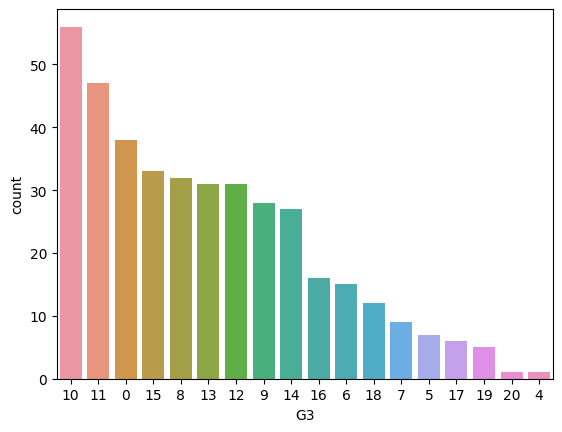

In [ ]:
sns.countplot(x='G3', data=data, order=data['G3'].value_counts().index)



*   Majority of the sudents has scored 10 in G3
*   Nearly 40 students has failed in G3



## **2. Feature Engineering**

In feature engineering, we convert the text values to numerical values to be readble by Machine Learning Algorithms.

### **Convert to numerical**

In [ ]:
#school
sch_map = {'GP':1, 'MS':2}
data['school'] = data['school'].map(sch_map)

In [ ]:
#sex
sex_map = {'F':1, 'M':2}
data['sex'] = data['sex'].map(sex_map)

In [ ]:
#address
fmap = {'U':1, 'R':2}
data['address'] = data['address'].map(fmap)

In [ ]:
#famsize
fmap = {'LE3':1, 'GT3':2}
data['famsize'] = data['famsize'].map(fmap)

In [ ]:
#Pstatus
fmap = {'T':1, 'A':2}
data['Pstatus'] = data['Pstatus'].map(fmap)

In [ ]:
#Mjob and Fjob
fmap = {'services':1, 'at_home':2, 'teacher':3, 'health':4, 'other':5}
data['Mjob'] = data['Mjob'].map(fmap)
data['Fjob'] = data['Fjob'].map(fmap)

In [ ]:
#reason
fmap = {'course':1, 'home':2, 'reputation':3, 'other':4}
data['reason'] = data['reason'].map(fmap)

In [ ]:
#guardian
fmap = {'mother':1, 'father':2, 'other':3}
data['guardian'] = data['guardian'].map(fmap)

In [ ]:
#schoolsup famsup paid
fmap = {'yes':1, 'no':0}
data['schoolsup'] = data['schoolsup'].map(fmap)
data['famsup'] = data['famsup'].map(fmap)
data['paid'] = data['paid'].map(fmap)
data['activities'] = data['activities'].map(fmap)
data['nursery'] = data['nursery'].map(fmap)
data['higher'] = data['higher'].map(fmap)
data['internet'] = data['internet'].map(fmap)
data['romantic'] = data['romantic'].map(fmap)

### **Feature Selection**

There are 33 columns in the dataset and this is going to be cumbersome for training our model. Let's train with best 15 columns only

In [ ]:
X = data.iloc[:, :32]
y = data.iloc[:, -1]

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k=15)
k_best.fit(X, y)

df_score = pd.Series(data=k_best.scores_, index=X.columns)
df_score

school          1.075490
sex             3.399950
age             2.277762
address         3.734921
famsize         2.096131
Pstatus         1.389328
Medu           13.894852
Fedu           10.375563
Mjob           15.129472
Fjob           19.952055
reason         11.355722
guardian        3.419273
traveltime      6.758151
studytime       6.231603
failures      140.934898
schoolsup      28.319018
famsup          5.303438
paid           16.129900
activities      7.601049
nursery         3.297083
higher          1.234479
internet        2.999142
romantic       20.089526
famrel          2.110686
freetime        4.479465
goout          10.472494
Dalc           17.082868
Walc           28.444167
health         10.176668
absences      648.166848
G1            319.716427
G2            451.680952
dtype: float64

<Axes: >

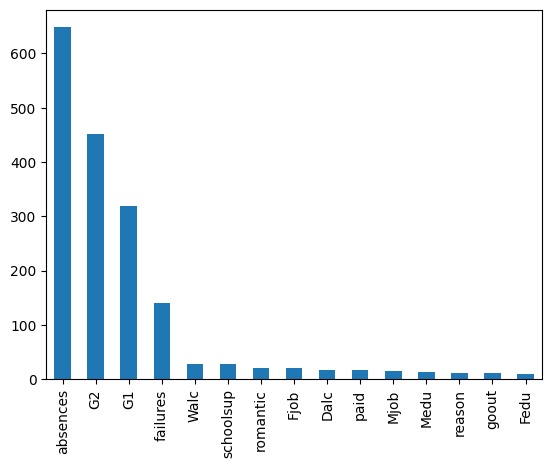

In [ ]:
df_score.nlargest(15).plot(kind='bar')

From the plot, absense, G2, G1 and failures are having best scores

From the feature selection score, let us define X

### **Heatmap correlation**

<Axes: >

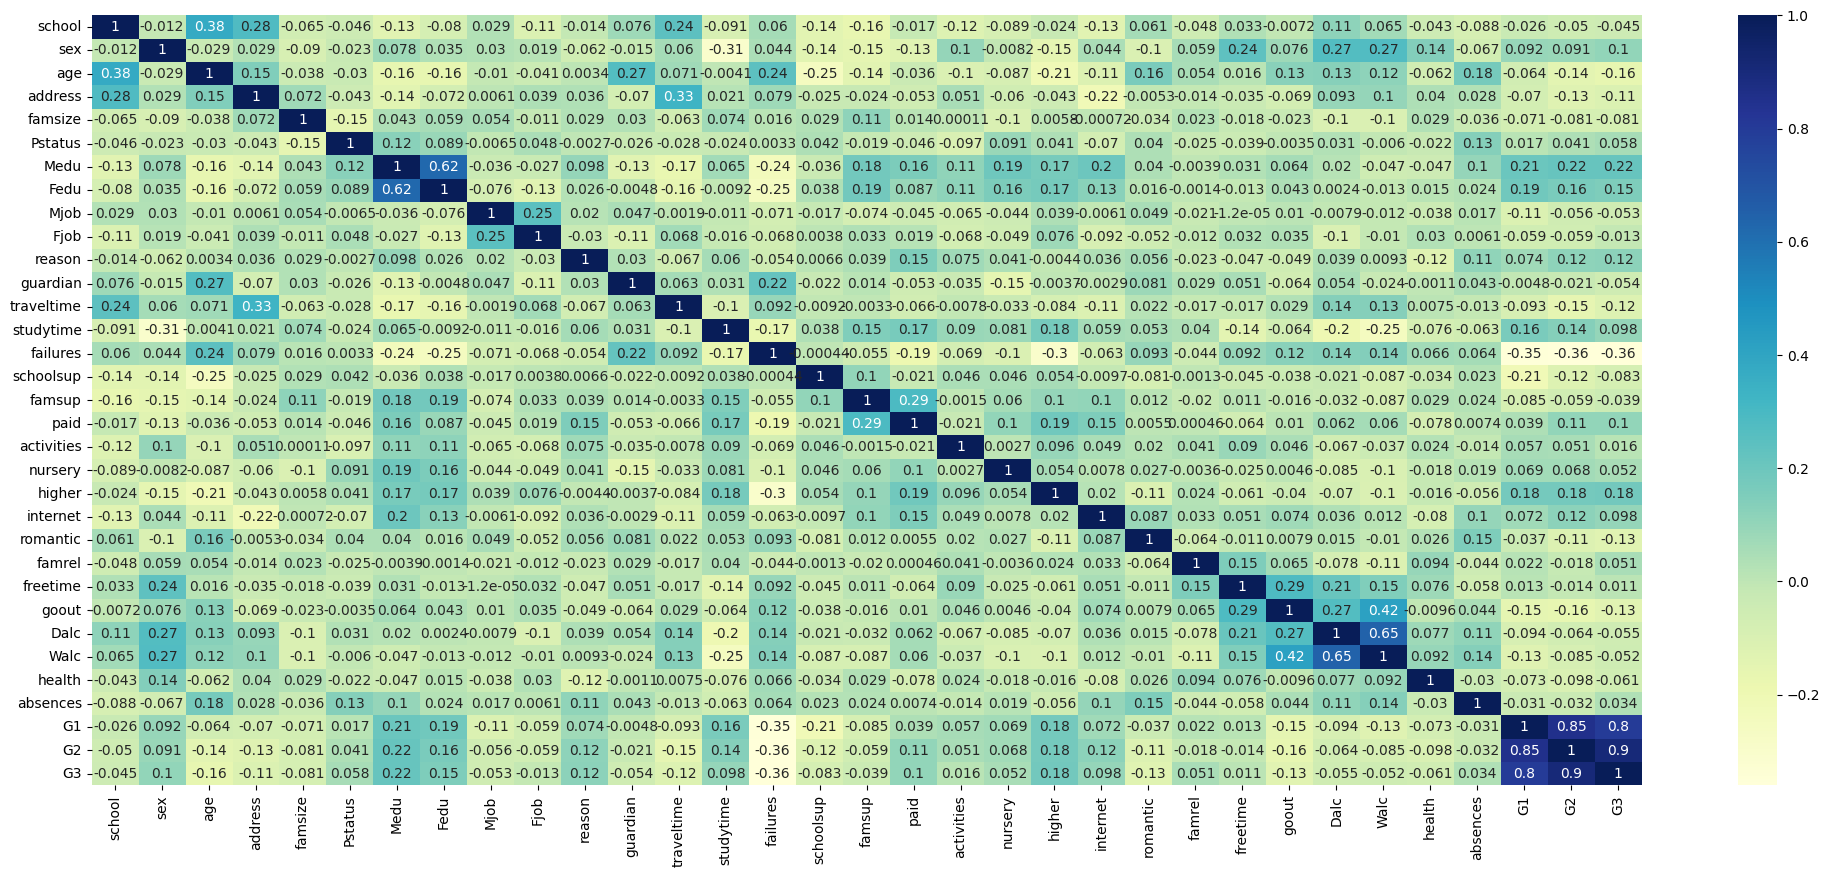

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

In [ ]:
data.corr()['G3'].nlargest(15)

G3           1.000000
G2           0.904868
G1           0.801468
Medu         0.217147
higher       0.182465
Fedu         0.152457
reason       0.120454
sex          0.103456
paid         0.101996
internet     0.098483
studytime    0.097820
Pstatus      0.058009
nursery      0.051568
famrel       0.051363
absences     0.034247
Name: G3, dtype: float64

From the heatmap plot, G1 & G2 are highly correlated with G3

In [ ]:
X = data[['G2','G1','absences','failures','Walc','schoolsup']]
y = data['G3']

### **Splitting data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

k_fold = KFold(n_splits=10, random_state=10, shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((316, 6), (79, 6), (316,), (79,))

## **3. Machine Learning Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

### **Find the scores**

In [ ]:
classifiers = {
    'Linear Regression' : LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'RandromForest': RandomForestRegressor(n_estimators=100),
    'GradientBoost': GradientBoostingRegressor(n_estimators=100),
    'SVM' : SVR()
}

for key, clf in classifiers.items():
    #clf.fit(X_train, y_train)
    score = cross_val_score(clf, X_train, y_train, cv=k_fold, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-score)
    rmse_score = round(np.mean(rmse), 2)
    print('RMSE score with CV of {0} is {1}'.format(key, rmse_score))

RMSE score with CV of Linear Regression is 1.91
RMSE score with CV of Lasso is 1.91
RMSE score with CV of Ridge is 1.91
RMSE score with CV of ElasticNet is 1.91
RMSE score with CV of RandromForest is 1.92
RMSE score with CV of GradientBoost is 1.74
RMSE score with CV of SVM is 1.9


From the above, GradientBoostRegressor is giving lesser error 1.74 with CV compared to other algorithms

### **Hyper parameter tuning using GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = GradientBoostingRegressor()
params = {
    'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[4,5,6,7]
}
gs = GridSearchCV(estimator=clf, param_grid=params, cv=k_fold, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid={'max_features': [4, 5, 6, 7],
                         'max_leaf_nodes': [3, 5, 7, 9],
                         'min_samples_split': [5, 9, 13]},
             scoring='neg_mean_squared_error')

In [ ]:
gs.best_params_

{'max_features': 6, 'max_leaf_nodes': 3, 'min_samples_split': 9}

In [ ]:
gb_clf = gs.best_estimator_

In [ ]:
gb_clf.fit(X_train, y_train)
y_predict = gb_clf.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
rmse

1.8608654568976057

GradientBoostingRegressor is giving RMSE of **2** with hyper parameter tuning

## **4. Deep Learning with Keras**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend
def build_regressor():
    regressor = Sequential()

    regressor.add(Dense(units=6, input_dim=6, activation='relu'))
    regressor.add(Dense(units=32, activation='relu'))
    regressor.add(Dense(units=1))

    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae'])
    return regressor

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=100)

<ipython-input-129-8d625b3db518>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor = KerasRegressor(build_fn=build_regressor, batch_size=20, epochs=100)


In [ ]:
X_train.head()

,G2,G1,absences,failures,Walc,schoolsup
266,9,9,2,0,4,0
352,7,8,7,1,3,0
97,9,8,2,0,1,0
167,15,14,0,0,1,0
280,8,8,30,0,4,0


In [ ]:
# Scale the train and test data before training the model
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
y_train = ss.fit_transform(np.array(y_train).reshape(-1, 1))

X_test = ss.fit_transform(X_test)
y_test = ss.fit_transform(np.array(y_test).reshape(-1,1))

In [ ]:
results=regressor.fit(X_train, y_train)

Epoch 1/100
16/16 [==============================] - 2s 5ms/step - loss: 0.8650 - mae: 0.7168
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6415 - mae: 0.6270
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5149 - mae: 0.5667
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4360 - mae: 0.5268
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.3763 - mae: 0.4887
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.3301 - mae: 0.4530
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2930 - mae: 0.4232
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.2649 - mae: 0.3951
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2418 - mae: 0.3731
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.2246 - mae: 0.3572
Epoch 11/100
16/16 [==============================] - 0s 5m

In [ ]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

4/4 [==============================] - 0s 3ms/step


0.4050301499691823

**RMSE: Keras: 0.43 ML: 2**

## **Training Using XGBoost**

In [ ]:
data = pd.read_csv("student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
#school
sch_map = {'GP':1, 'MS':2}
data['school'] = data['school'].map(sch_map)

#sex
sex_map = {'F':1, 'M':2}
data['sex'] = data['sex'].map(sex_map)

#address
fmap = {'U':1, 'R':2}
data['address'] = data['address'].map(fmap)

#famsize
fmap = {'LE3':1, 'GT3':2}
data['famsize'] = data['famsize'].map(fmap)

#Pstatus
fmap = {'T':1, 'A':2}
data['Pstatus'] = data['Pstatus'].map(fmap)

#Mjob and Fjob
fmap = {'services':1, 'at_home':2, 'teacher':3, 'health':4, 'other':5}
data['Mjob'] = data['Mjob'].map(fmap)
data['Fjob'] = data['Fjob'].map(fmap)

#reason
fmap = {'course':1, 'home':2, 'reputation':3, 'other':4}
data['reason'] = data['reason'].map(fmap)

#guardian
fmap = {'mother':1, 'father':2, 'other':3}
data['guardian'] = data['guardian'].map(fmap)

#schoolsup famsup paid
fmap = {'yes':1, 'no':0}
data['schoolsup'] = data['schoolsup'].map(fmap)
data['famsup'] = data['famsup'].map(fmap)
data['paid'] = data['paid'].map(fmap)
data['activities'] = data['activities'].map(fmap)
data['nursery'] = data['nursery'].map(fmap)
data['higher'] = data['higher'].map(fmap)
data['internet'] = data['internet'].map(fmap)
data['romantic'] = data['romantic'].map(fmap)

In [ ]:
X = data.iloc[:, :32]
y = data.iloc[:, -1]

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

k_best = SelectKBest(score_func=chi2, k=15)
k_best.fit(X, y)

df_score = pd.Series(data=k_best.scores_, index=X.columns)
df_score

school          1.075490
sex             3.399950
age             2.277762
address         3.734921
famsize         2.096131
Pstatus         1.389328
Medu           13.894852
Fedu           10.375563
Mjob           15.129472
Fjob           19.952055
reason         11.355722
guardian        3.419273
traveltime      6.758151
studytime       6.231603
failures      140.934898
schoolsup      28.319018
famsup          5.303438
paid           16.129900
activities      7.601049
nursery         3.297083
higher          1.234479
internet        2.999142
romantic       20.089526
famrel          2.110686
freetime        4.479465
goout          10.472494
Dalc           17.082868
Walc           28.444167
health         10.176668
absences      648.166848
G1            319.716427
G2            451.680952
dtype: float64

In [ ]:
X = data[['G1','G2','absences','failures','Walc','schoolsup']]
y = data['G3']

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xg = XGBRegressor()
xg.fit(X_train, y_train)
y_predxg = xg.predict(X_test)
mse = mean_squared_error(y_test, y_predxg)
rmse = np.sqrt(mse)
print(rmse)

1.9433217493783188
